<a href="https://colab.research.google.com/github/nikfed280199/anime_recommendation/blob/main/anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
anime_df = pd.read_csv("/content/drive/MyDrive/Курс 3/Семестр6/CourseProject/asd/anime.csv")
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
anime_df.shape

(12294, 7)

In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


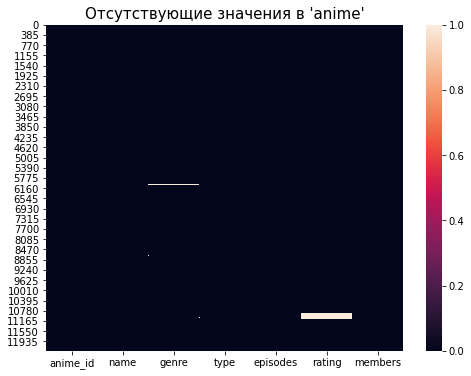

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(anime_df.isnull())
plt.title("Отсутствующие значения в 'anime'", fontsize = 15)
plt.show()

In [ ]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
anime_df.fillna({'type':"TV"},inplace=True)

In [ ]:
anime_df.fillna({'rating':0},inplace=True)

In [ ]:
anime_df.shape

(12294, 7)

In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime_df.drop('genre', axis=1, inplace=True)

In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   type      12294 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12294 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 576.4+ KB


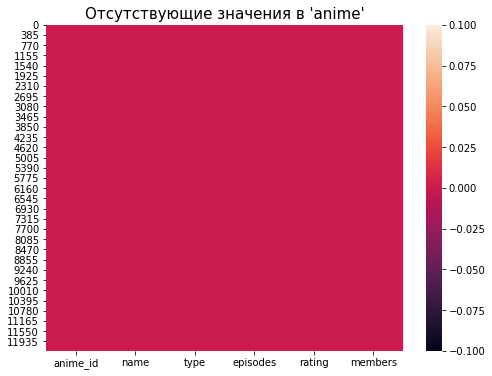

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(anime_df.isnull())
plt.title("Отсутствующие значения в 'anime'", fontsize = 15)
plt.show()

In [ ]:
rating_df = pd.read_csv("/content/drive/MyDrive/Курс 3/Семестр6/CourseProject/asd/rating.csv")
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
rating_df.shape

(7813737, 3)

In [ ]:
df = pd.merge(anime_df, rating_df, on = 'anime_id')
df.head()

,anime_id,name,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,Movie,1,9.37,200630,278,-1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


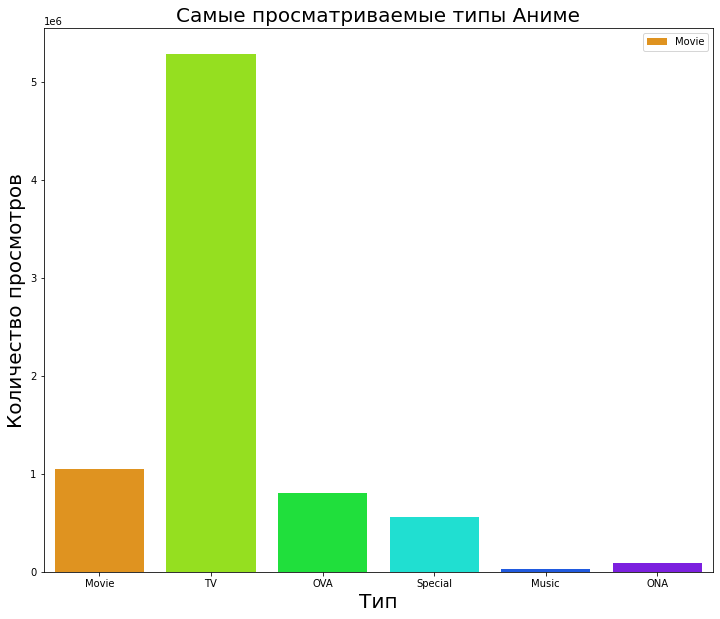

In [ ]:
fig = plt.figure(figsize=(12,10))
sns.countplot(df['type'], palette='gist_rainbow')
plt.title("Самые просматриваемые типы Аниме", fontsize=20)
plt.xlabel("Тип", fontsize=20)
plt.ylabel("Количество просмотров", fontsize = 20)
plt.legend(df['type'])
plt.show()

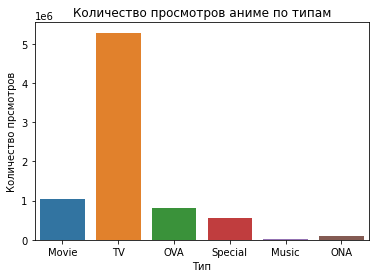

In [ ]:
sns.countplot(data = df, x = "type")
plt.title("Количество просмотров аниме по типам")
plt.xlabel("Тип")
plt.ylabel("Количество прсмотров")
plt.show()

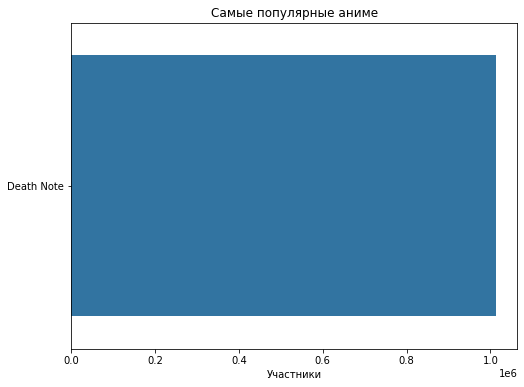

In [ ]:
plt.figure(figsize = (8,6))
df_members = df.sort_values(by = "members", ascending = False).copy()
sns.barplot(data = df_members.iloc[0:10], y = "name", x = "members")
plt.title("Самые популярные аниме", size = 12)
plt.xlabel("Участники")
plt.ylabel("")
plt.show()

In [ ]:
df.shape

(7813727, 8)

In [ ]:
df.rating_x.min()

0.0

In [ ]:
df = df[df.rating_y != -1]
df.head()

,anime_id,name,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,Movie,1,9.37,200630,271,10
5,32281,Kimi no Na wa.,Movie,1,9.37,200630,322,10


In [ ]:
df.shape

(6337239, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337239 entries, 0 to 7813724
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   name      object 
 2   type      object 
 3   episodes  object 
 4   rating_x  float64
 5   members   int64  
 6   user_id   int64  
 7   rating_y  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 435.1+ MB


In [ ]:
df.isnull().sum()

anime_id    0
name        0
type        0
episodes    0
rating_x    0
members     0
user_id     0
rating_y    0
dtype: int64

In [ ]:
df.drop('name', axis=1, inplace=True)

In [ ]:
#df.drop('genre', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337239 entries, 0 to 7813724
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   type      object 
 2   episodes  object 
 3   rating_x  float64
 4   members   int64  
 5   user_id   int64  
 6   rating_y  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 386.8+ MB


In [ ]:
df.type.value_counts()

TV         4364298
Movie       842153
OVA         617166
Special     421628
ONA          72123
Music        19871
Name: type, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337239 entries, 0 to 7813724
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   anime_id      int64  
 1   episodes      object 
 2   rating_x      float64
 3   members       int64  
 4   user_id       int64  
 5   rating_y      int64  
 6   type_Movie    uint8  
 7   type_Music    uint8  
 8   type_ONA      uint8  
 9   type_OVA      uint8  
 10  type_Special  uint8  
 11  type_TV       uint8  
dtypes: float64(1), int64(4), object(1), uint8(6)
memory usage: 374.7+ MB


In [ ]:
df.episodes.value_counts()

12     1420731
1      1386432
13      785211
26      449997
24      447753
        ...   
263          1
199          1
225          1
136          1
240          1
Name: episodes, Length: 178, dtype: int64

In [ ]:
df.head(10)

,anime_id,episodes,rating_x,members,user_id,rating_y,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,1,9.37,200630,99,5,1,0,0,0,0,0
1,32281,1,9.37,200630,152,10,1,0,0,0,0,0
2,32281,1,9.37,200630,244,10,1,0,0,0,0,0
3,32281,1,9.37,200630,271,10,1,0,0,0,0,0
5,32281,1,9.37,200630,322,10,1,0,0,0,0,0
6,32281,1,9.37,200630,398,10,1,0,0,0,0,0
7,32281,1,9.37,200630,462,8,1,0,0,0,0,0
8,32281,1,9.37,200630,490,10,1,0,0,0,0,0
9,32281,1,9.37,200630,548,10,1,0,0,0,0,0
10,32281,1,9.37,200630,570,10,1,0,0,0,0,0


In [ ]:
df[df['episodes'] == 'Unknown']

,anime_id,episodes,rating_x,members,user_id,rating_y,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
7686348,32237,Unknown,5.00,37,12431,1,0,0,0,0,0,1
7689759,33846,Unknown,4.74,153,13954,4,0,0,0,0,1,0
7689817,30484,Unknown,0.00,60999,31437,9,0,0,0,0,0,1
7689818,30484,Unknown,0.00,60999,37475,7,0,0,0,0,0,1
7689819,30484,Unknown,0.00,60999,42372,9,0,0,0,0,0,1
7689820,30484,Unknown,0.00,60999,45904,9,0,0,0,0,0,1


In [ ]:
df = df.loc[df['episodes'] != 'Unknown']

In [ ]:
df[df['episodes'] == 'Unknown']

,anime_id,episodes,rating_x,members,user_id,rating_y,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV


In [ ]:
df.episodes = df.episodes.astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337233 entries, 0 to 7813724
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   anime_id      int64  
 1   episodes      int64  
 2   rating_x      float64
 3   members       int64  
 4   user_id       int64  
 5   rating_y      int64  
 6   type_Movie    uint8  
 7   type_Music    uint8  
 8   type_ONA      uint8  
 9   type_OVA      uint8  
 10  type_Special  uint8  
 11  type_TV       uint8  
dtypes: float64(1), int64(5), uint8(6)
memory usage: 374.7 MB


In [ ]:
df.head()

,anime_id,episodes,rating_x,members,user_id,rating_y,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,1,9.37,200630,99,5,1,0,0,0,0,0
1,32281,1,9.37,200630,152,10,1,0,0,0,0,0
2,32281,1,9.37,200630,244,10,1,0,0,0,0,0
3,32281,1,9.37,200630,271,10,1,0,0,0,0,0
5,32281,1,9.37,200630,322,10,1,0,0,0,0,0


In [ ]:
#df = df[:100]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337233 entries, 0 to 7813724
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   anime_id      int64  
 1   episodes      int64  
 2   rating_x      float64
 3   members       int64  
 4   user_id       int64  
 5   rating_y      int64  
 6   type_Movie    uint8  
 7   type_Music    uint8  
 8   type_ONA      uint8  
 9   type_OVA      uint8  
 10  type_Special  uint8  
 11  type_TV       uint8  
dtypes: float64(1), int64(5), uint8(6)
memory usage: 374.7 MB


In [ ]:
len(df.anime_id.unique())

9923

In [ ]:
y = df["rating_y"]
X = df.drop("rating_y", axis=1)

In [ ]:
X

,anime_id,episodes,rating_x,members,user_id,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,1,9.37,200630,99,1,0,0,0,0,0
1,32281,1,9.37,200630,152,1,0,0,0,0,0
2,32281,1,9.37,200630,244,1,0,0,0,0,0
3,32281,1,9.37,200630,271,1,0,0,0,0,0
5,32281,1,9.37,200630,322,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7813713,9316,1,4.15,211,58483,0,0,0,1,0,0
7813716,5543,1,4.28,183,49503,0,0,0,1,0,0
7813717,5543,1,4.28,183,58483,0,0,0,1,0,0
7813720,5621,4,4.88,219,49503,0,0,0,1,0,0


In [ ]:
y

0           5
1          10
2          10
3          10
5          10
           ..
7813713     1
7813716     4
7813717     1
7813720     6
7813724     4
Name: rating_y, Length: 6337233, dtype: int64

# Строим модель

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [ ]:
X_train

,anime_id,episodes,rating_x,members,user_id,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
1963796,1023,4,8.13,37679,30014,0,0,0,1,0,0
562664,2251,13,8.54,363215,40551,0,0,0,0,0,1
4716840,5667,6,7.51,79923,37925,0,0,0,1,0,0
2841381,20767,2,7.89,104775,4497,0,0,0,1,0,0
876705,4224,25,8.45,633817,60493,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2676923,322,12,7.93,86380,47823,0,0,0,0,0,1
6282543,4094,6,7.12,15958,15106,0,0,0,1,0,0
2634874,16904,1,7.94,98549,41931,1,0,0,0,0,0
1752787,25879,13,8.18,80763,71792,0,0,0,0,0,1


In [ ]:
y_train

1963796     6
562664     10
4716840     9
2841381    10
876705      8
           ..
2676923     9
6282543     6
2634874     8
1752787     9
5455236     9
Name: rating_y, Length: 5069786, dtype: int64

**LINREG**

In [ ]:
from sklearn import ensemble, linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
linreg = linear_model.LinearRegression()

In [ ]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_test_linreg = linreg.predict(X_test)

In [ ]:
y_test

3838031     6
2711021     7
7153007     7
2949842     4
3664970     7
           ..
956176      7
4278931     7
389361      6
3317029    10
3700269    10
Name: rating_y, Length: 1267447, dtype: int64

In [ ]:
y_test_linreg

array([7.82669966, 8.09609393, 6.89997   , ..., 8.76800425, 7.95365033,
       7.86429824])

(array([  3336.,   4624.,   8295.,  20783.,  56594., 128026., 275022.,
        328899., 251208., 190660.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

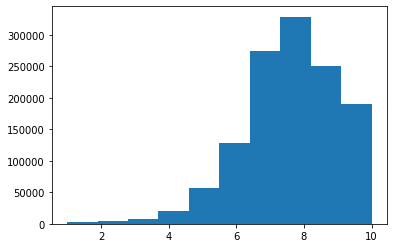

In [ ]:
plt.hist(y_test)

(array([2.66000e+02, 8.70000e+01, 6.51000e+02, 1.06200e+03, 5.93800e+03,
        3.65290e+04, 1.90490e+05, 5.19941e+05, 4.25912e+05, 8.65710e+04]),
 array([2.37263846, 3.07374985, 3.77486123, 4.47597261, 5.17708399,
        5.87819538, 6.57930676, 7.28041814, 7.98152953, 8.68264091,
        9.38375229]),
 <a list of 10 Patch objects>)

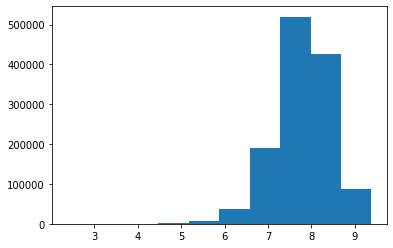

In [ ]:
plt.hist(y_test_linreg)

In [ ]:
mean_squared_error(y_test_linreg, y_test)

2.053301334031836

**Random forest**

In [ ]:
rf = ensemble.RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=7)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_test_rf = rf.predict(X_test)

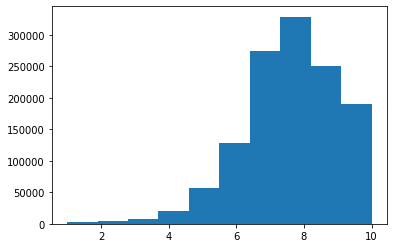

In [ ]:
plt.hist(y_test);

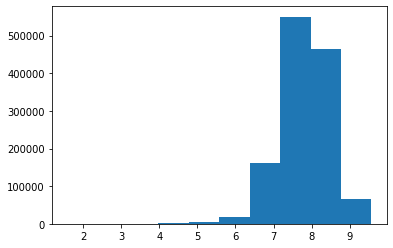

In [ ]:
plt.hist(y_test_rf);

In [ ]:
mean_squared_error(y_test_rf, y_test)

2.0481371069717444